In [7]:
import sys, os
sys.path.append('../../')
import operator
import json
from utils import utils
json_file = "../../gtex_v8_metadata.json"
tissue_file = "../../plots/tissue_table.txt"
tshorts, tfulls_plain = utils.read_tissues(tissue_file, plain=True)
_, tfulls = utils.read_tissues(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors  = dict()
tissue_names   = dict()
tissue_samples = dict()
for tshort, tfull in zip(tshorts, tfulls_plain):
    tissue_names[tshort] = tfull
for tshort, tfull in zip(tshorts, tfulls):
    tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]
    tissue_samples[tshort] = gtex_meta[tfull.replace(" ", "_")]["rnaSeqAndGenotypeSampleCount"]

brain_tissues = ['bam','ban','bca','bceh','bce','bco','bfr','bhi','bhy','bnu','bpu','bsp','bsu']   
optim_tissues = ['haa', 'pan', 'spl', 'wb']


In [8]:
### Read data file

res_dict = dict()
with open("crossmappability_teqtls_results_summary.txt") as inst:
    headerstr = inst.readline()
    headers   = headerstr.rstrip().split("\t")[1:]
    for line in inst:
        l = line.rstrip().split("\t")
        res_dict[l[0]] = dict(zip(headers, [float(x) for x in l[1:]]))
res_dict

{'as': {'total_before': 612.0,
  'total_after': 408.0,
  'filtered_out': 219.0,
  'brought_in': 15.0,
  'mean_gdiff_filtered_out': 6467.57,
  'mean_gdiff_brought_in': 6036.07},
 'av': {'total_before': 487.0,
  'total_after': 306.0,
  'filtered_out': 198.0,
  'brought_in': 17.0,
  'mean_gdiff_filtered_out': 6464.1,
  'mean_gdiff_brought_in': 5964.94},
 'ag': {'total_before': 192.0,
  'total_after': 142.0,
  'filtered_out': 52.0,
  'brought_in': 2.0,
  'mean_gdiff_filtered_out': 6465.62,
  'mean_gdiff_brought_in': 5153.0},
 'aa': {'total_before': 1376.0,
  'total_after': 986.0,
  'filtered_out': 412.0,
  'brought_in': 22.0,
  'mean_gdiff_filtered_out': 6279.07,
  'mean_gdiff_brought_in': 5312.86},
 'ac': {'total_before': 1618.0,
  'total_after': 1271.0,
  'filtered_out': 372.0,
  'brought_in': 25.0,
  'mean_gdiff_filtered_out': 6417.63,
  'mean_gdiff_brought_in': 5767.88},
 'at': {'total_before': 424.0,
  'total_after': 355.0,
  'filtered_out': 99.0,
  'brought_in': 30.0,
  'mean_gdiff_f

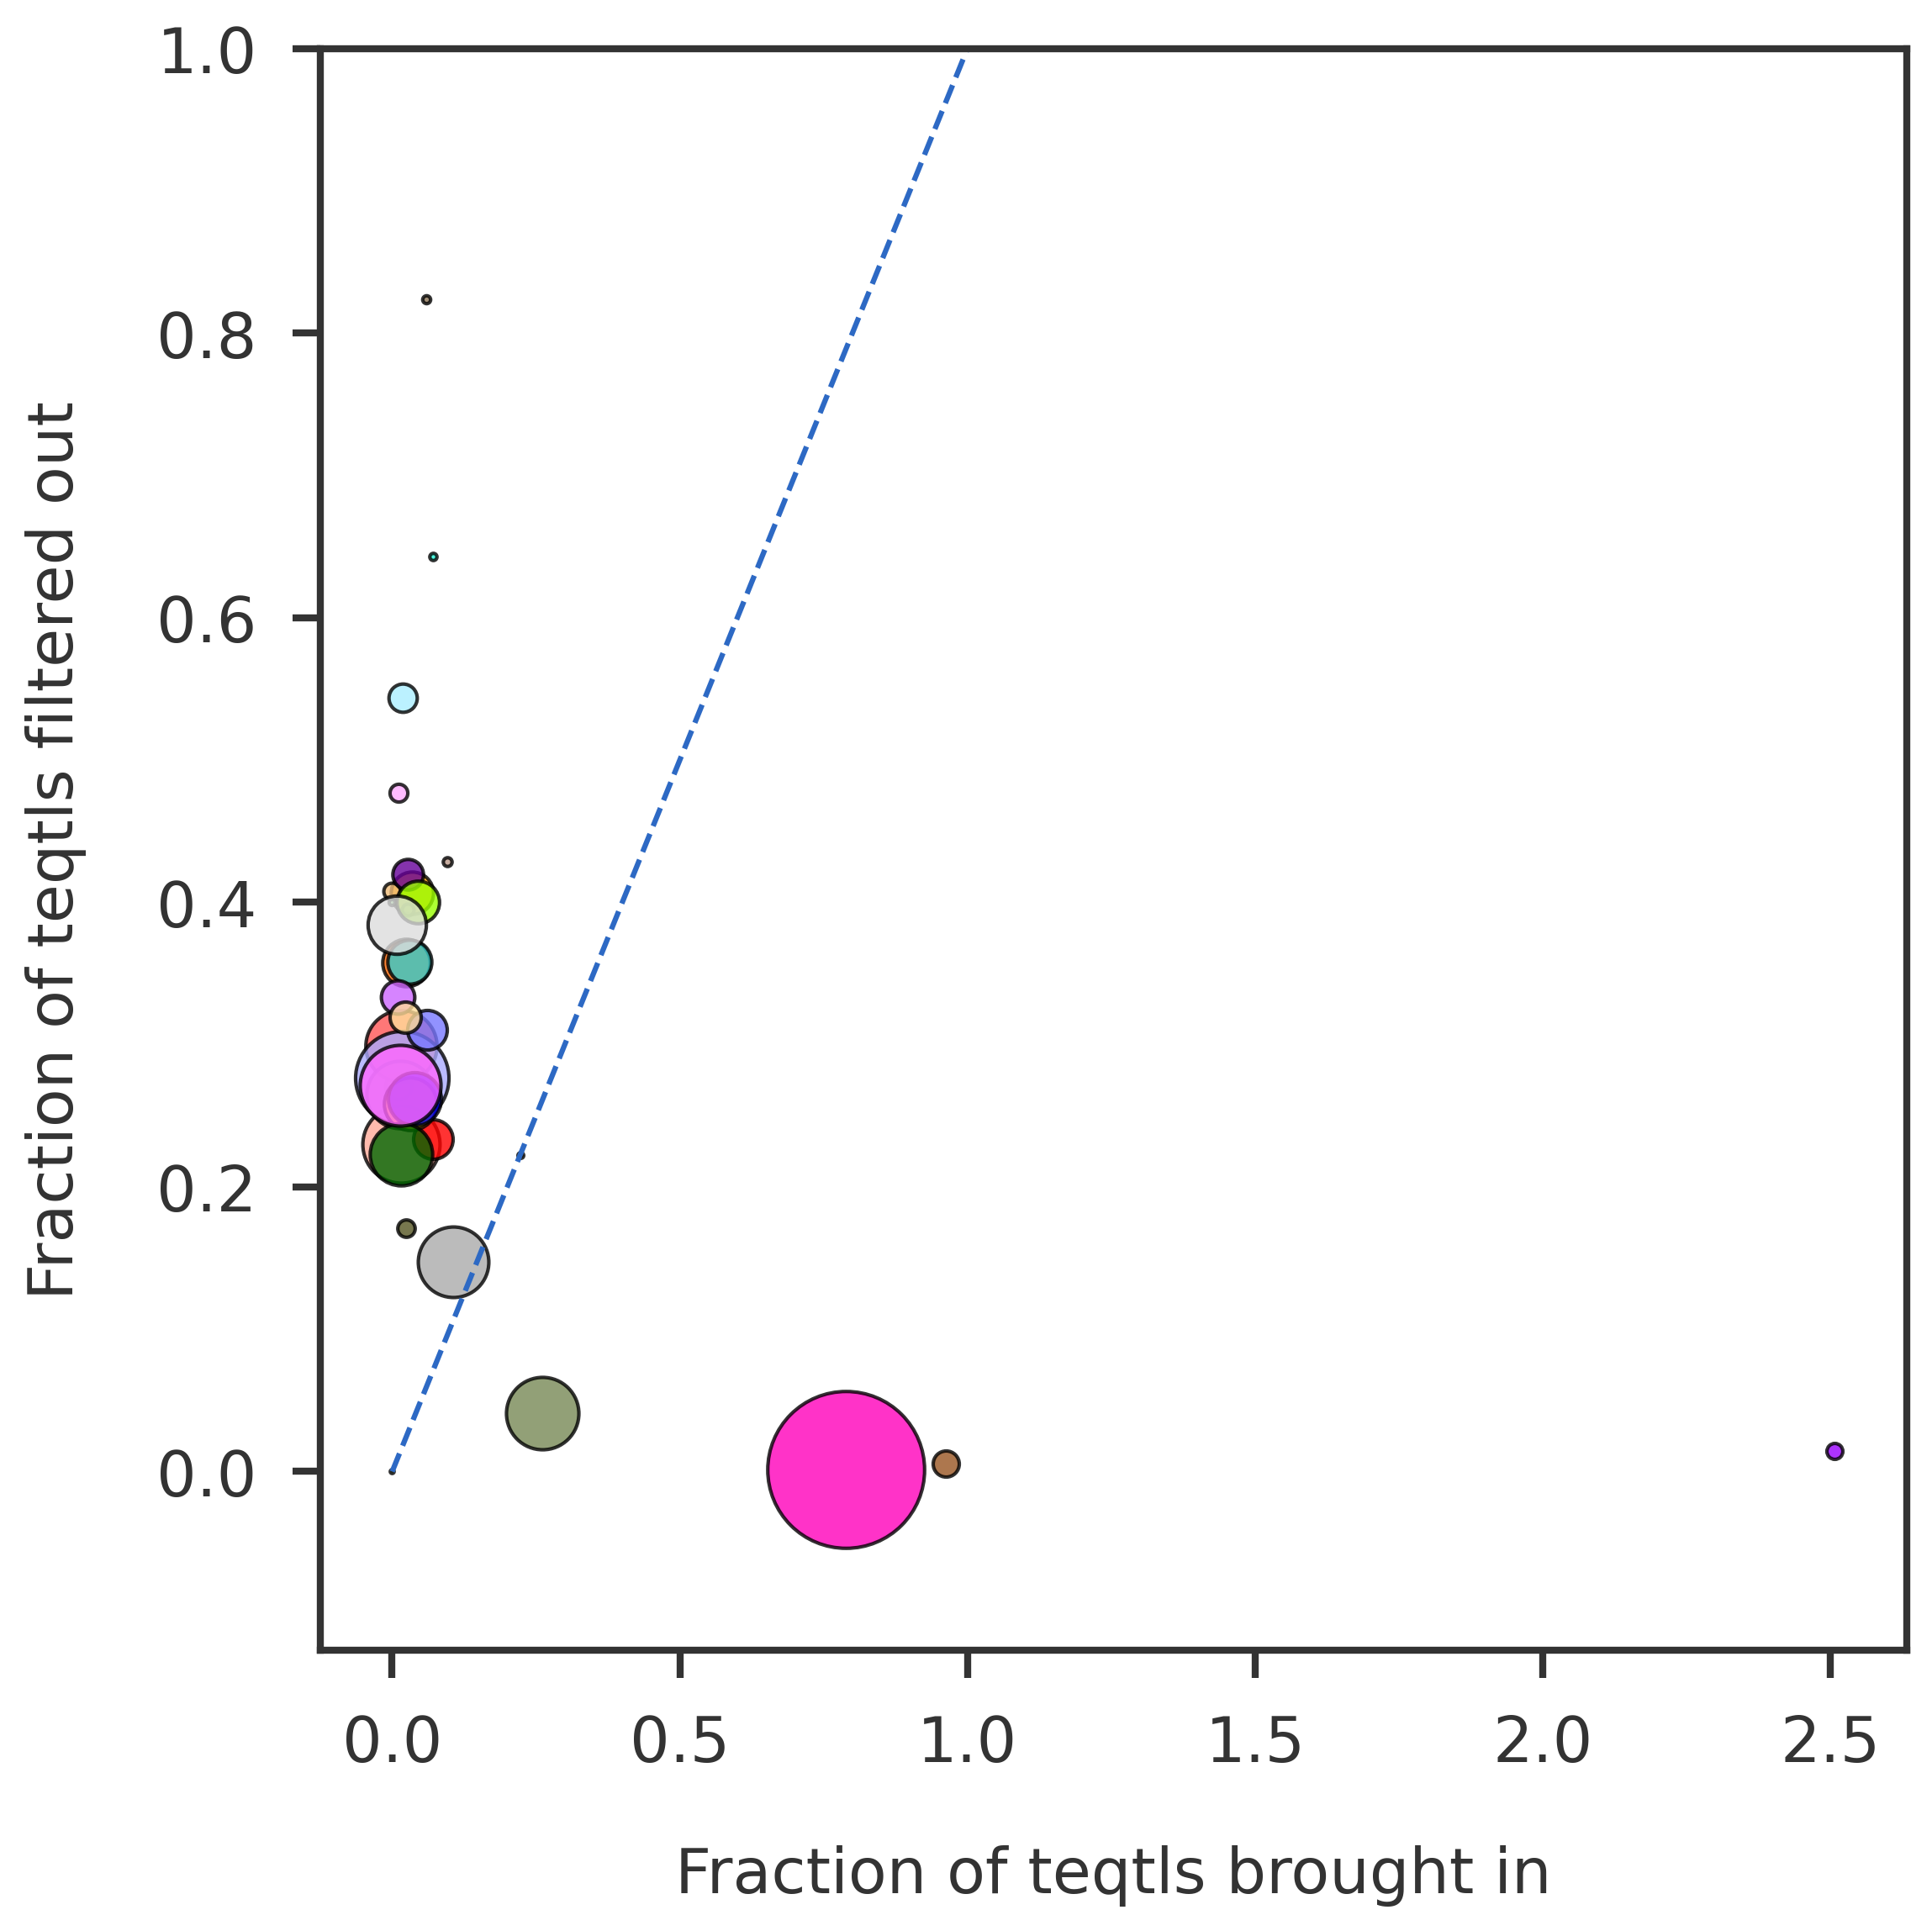

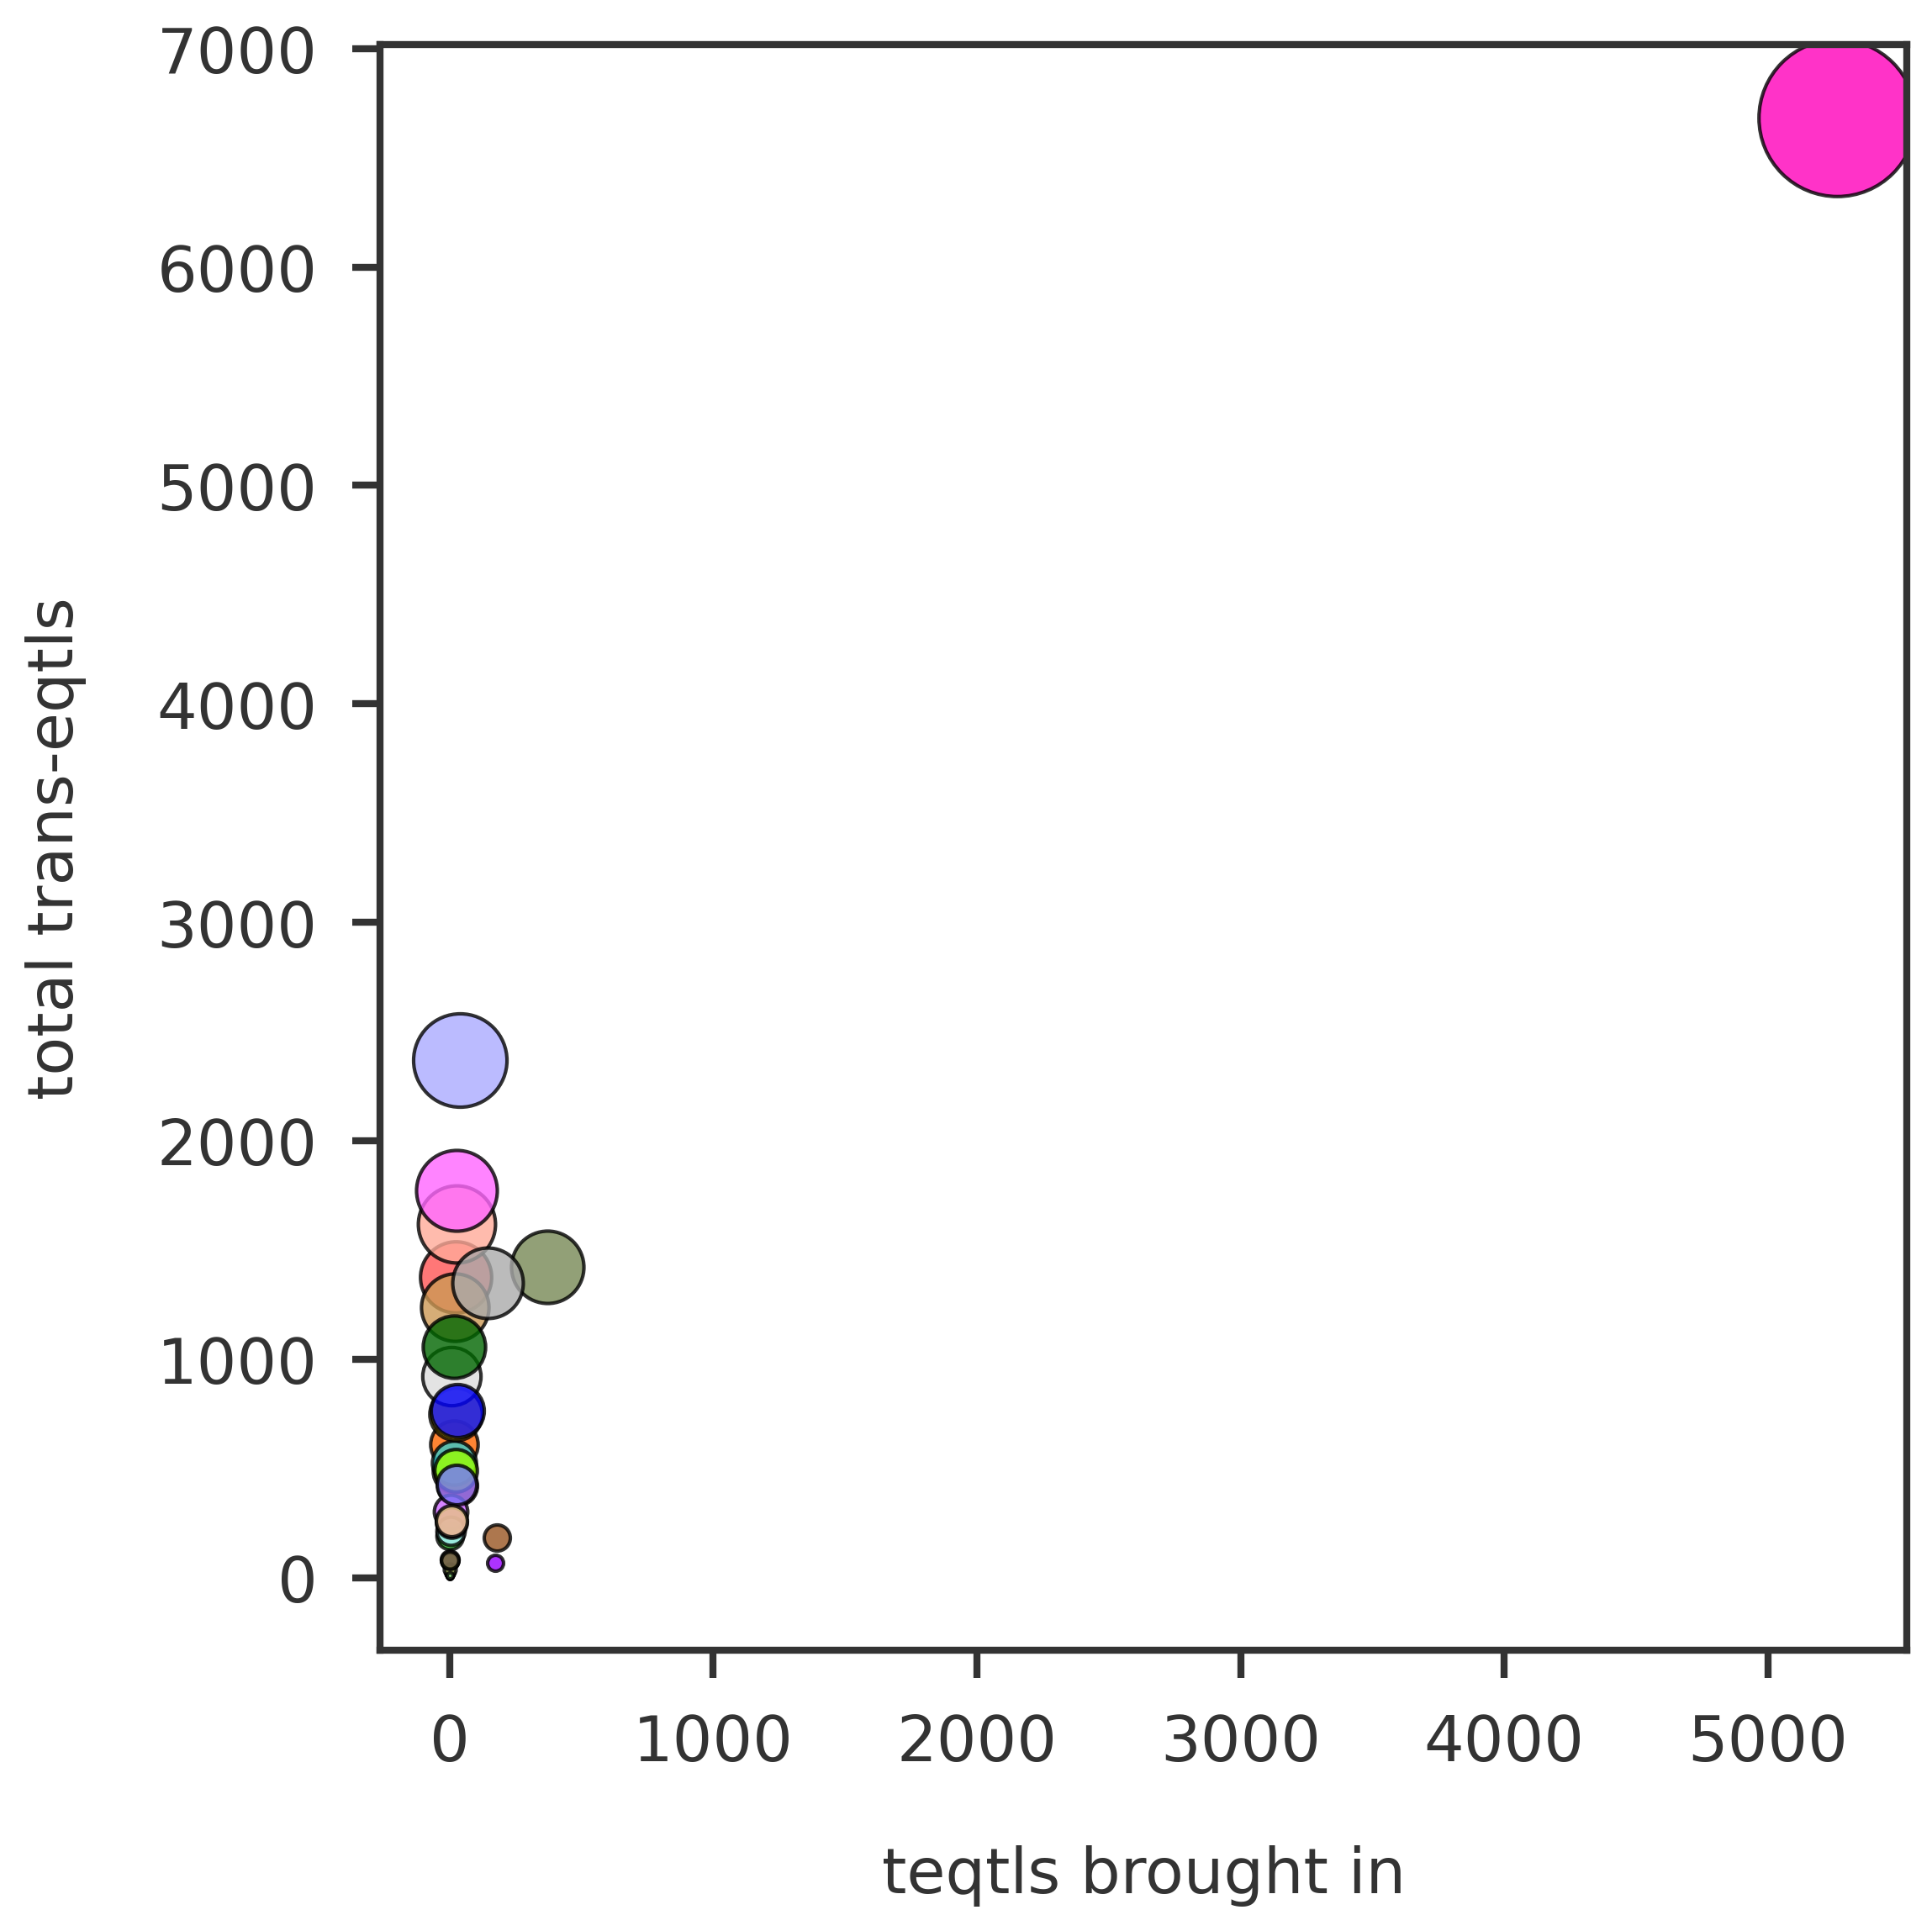

In [9]:
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt')


res_dict ## will contain a dict with the table above
x_frac_brin = list()
y_frac_fout = list()
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res_dict:
            print(f"{ts} not in dataset")
            continue
        else:
            if res_dict[ts]["total_before"] != 0:
                x_frac_brin.append(res_dict[ts]["brought_in"]  /res_dict[ts]["total_before"])
                y_frac_fout.append(res_dict[ts]["filtered_out"]/res_dict[ts]["total_before"])
                ts_indata.append(ts)

ts_color = dict()
ed_color = dict()
ts_alpha = dict()
ts_size  = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    ts_size[ts]  = res_dict[ts]["total_before"] * 0.3
    
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
for i, ts in enumerate(ts_indata):
    ax1.scatter(x_frac_brin[i], y_frac_fout[i], s=ts_size[ts], color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.plot([0,max(x_frac_brin+y_frac_fout)],[0,max(x_frac_brin+y_frac_fout)], linestyle="--")
ax1.set_xlabel("Fraction of teqtls brought in")
ax1.set_ylabel("Fraction of teqtls filtered out")
ax1.set_ylim(bottom=None,top=1)

plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
for i, ts in enumerate(ts_indata):
    ax1.scatter(res_dict[ts]["brought_in"], res_dict[ts]["total_before"], s=ts_size[ts], color=ts_color[ts], edgecolor = 'black', alpha = 0.8)
ax1.set_xlabel("teqtls brought in")
ax1.set_ylabel("total trans-eqtls")

plt.tight_layout()
plt.show()

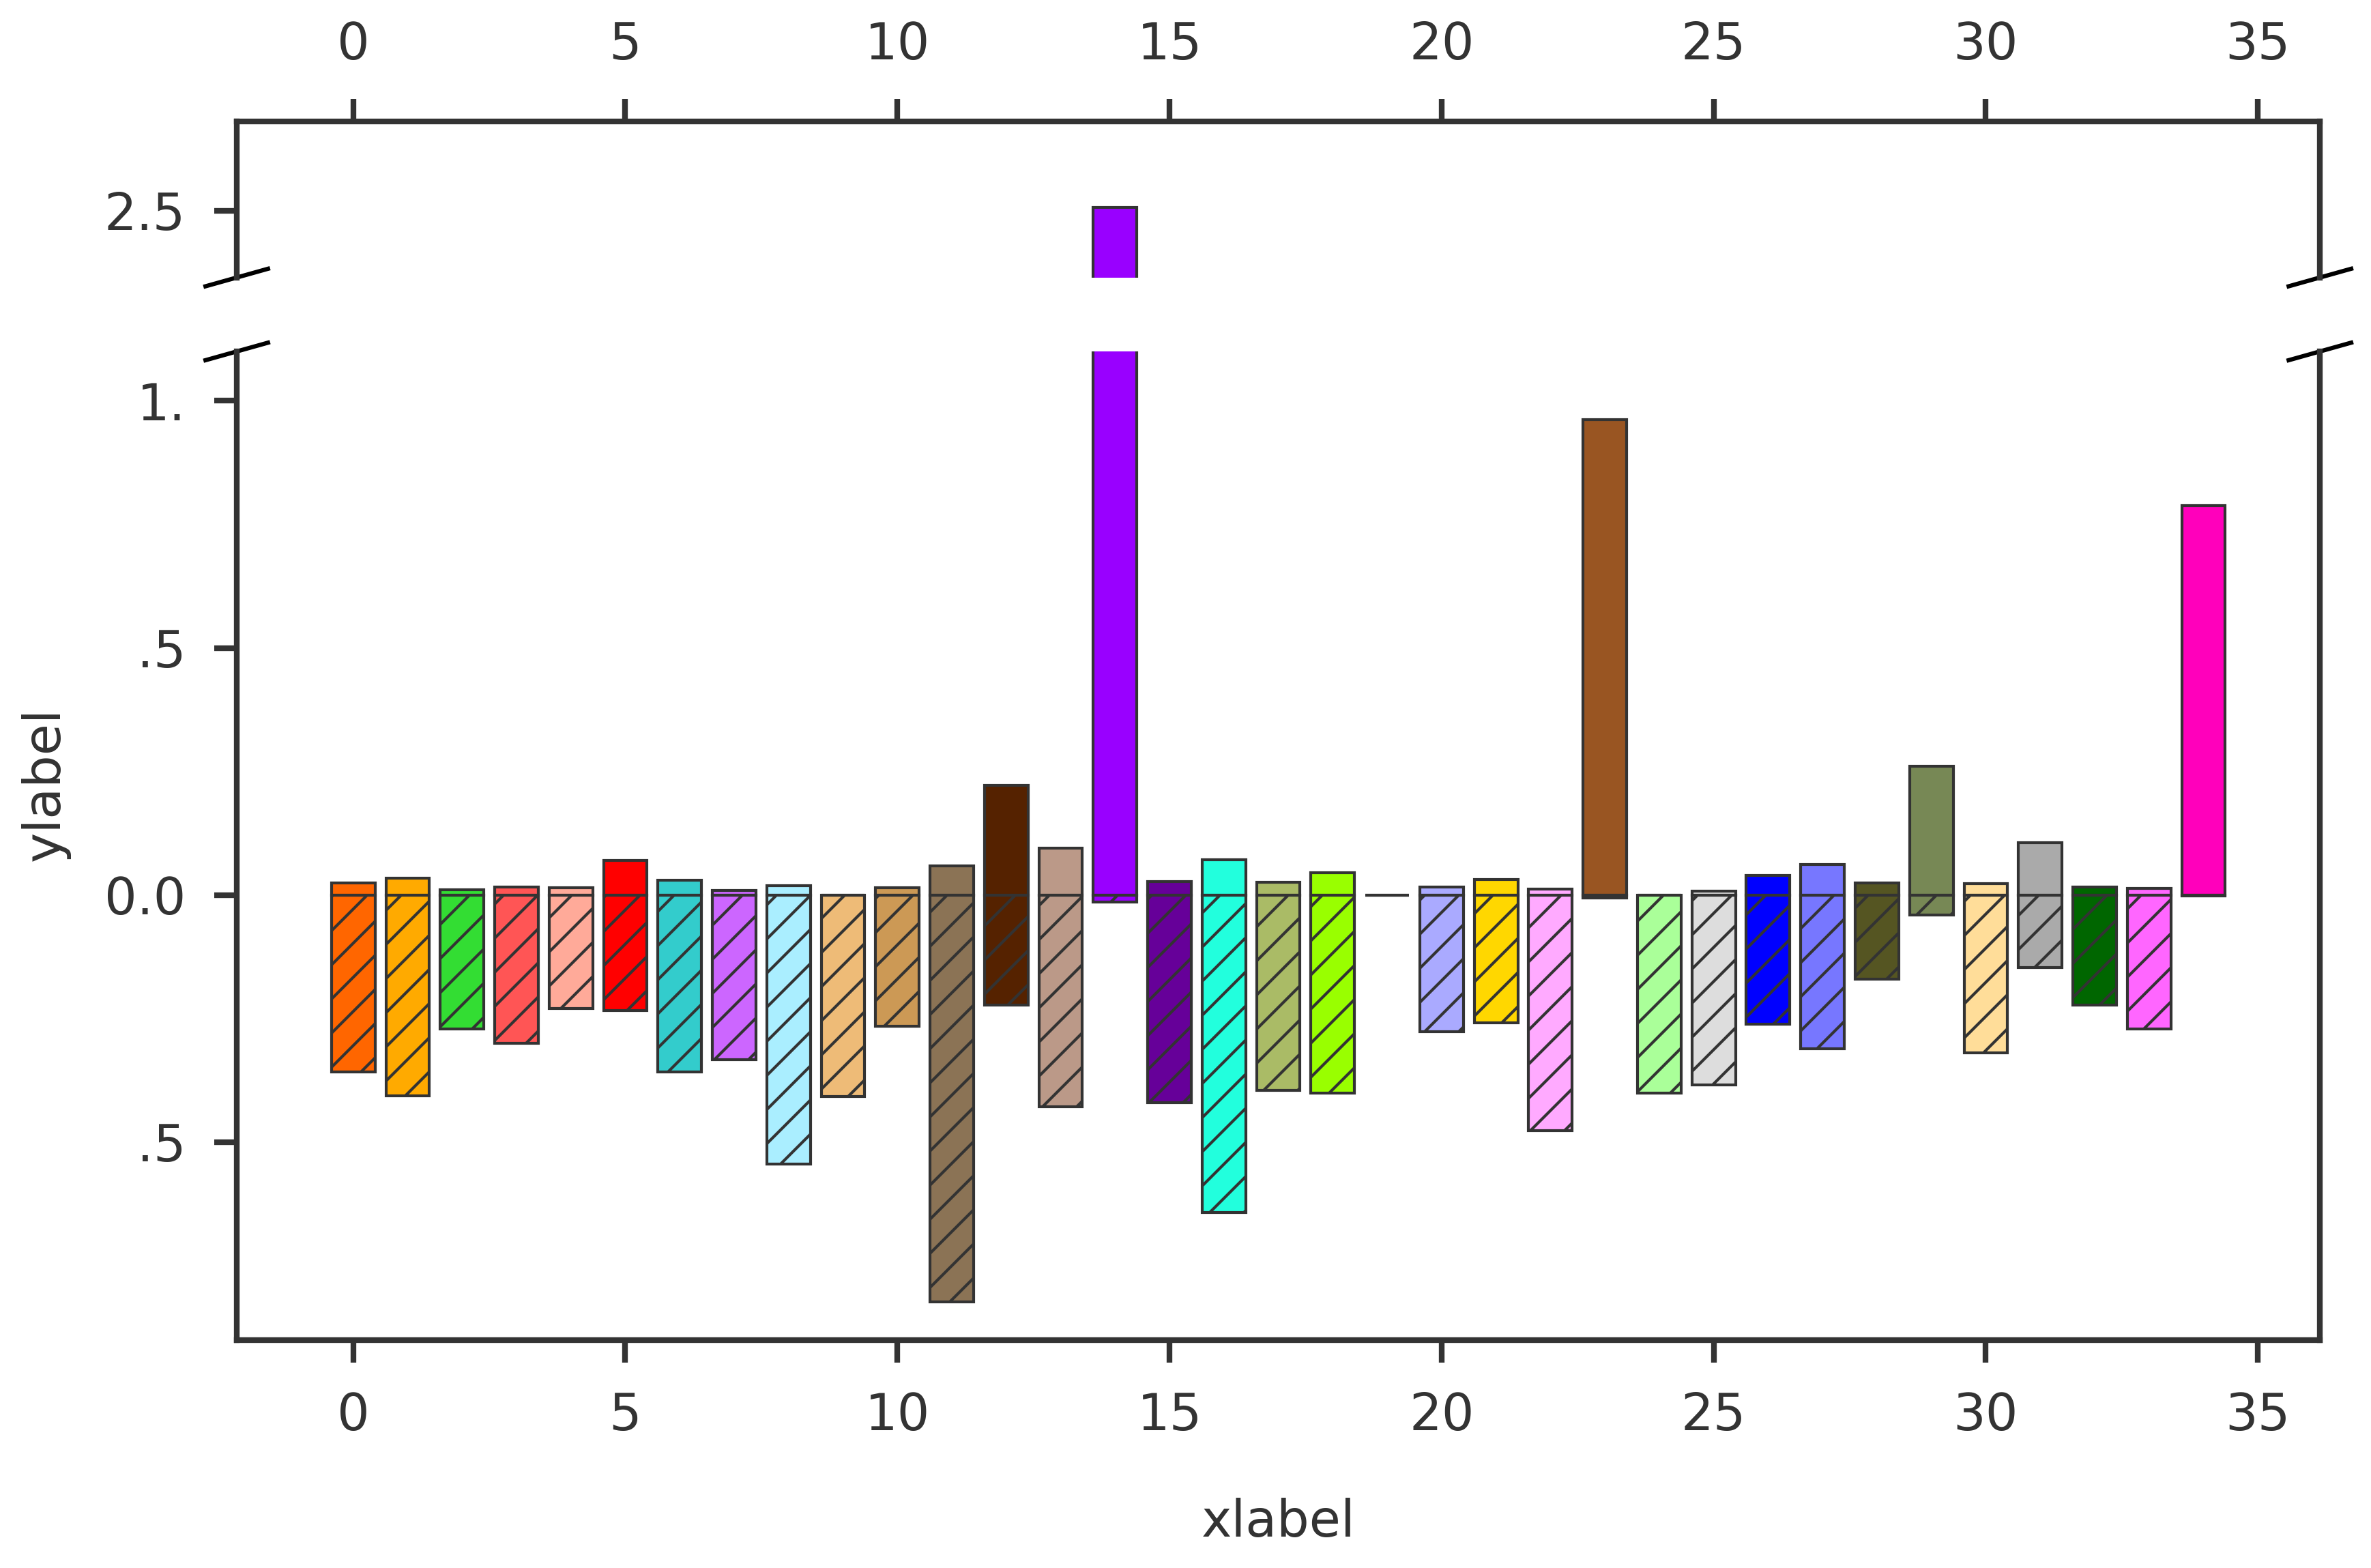

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt')
import matplotlib.gridspec as gridspec


res_dict ## will contain a dict with the table above
x_frac_brin = list()
y_frac_fout = list()
ts_indata = list()
for ts in tshorts:
    if ts not in brain_tissues:
        if ts not in res_dict:
            print(f"{ts} not in dataset")
            continue
        else:
            if res_dict[ts]["total_before"] != 0:
                x_frac_brin.append(res_dict[ts]["brought_in"]  /res_dict[ts]["total_before"])
                y_frac_fout.append(res_dict[ts]["filtered_out"]/res_dict[ts]["total_before"])
                ts_indata.append(ts)

x_frac_brin = np.array(x_frac_brin)
y_frac_fout = np.array(y_frac_fout)

ts_color = dict()
ed_color = dict()
ts_alpha = dict()
ts_size  = dict()
pval_c = 0.05
for ts in ts_indata:
    ts_color[ts] = tissue_colors[ts]
    ts_alpha[ts] = 0.9
    ed_color[ts] = "face"
    ts_size[ts]  = res_dict[ts]["total_before"] * 0.3
    
    
ylim = [2.0, 2.3]
ylim2 = [-.8, 1.1]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 1, height_ratios=[ylimratio, ylim2ratio])
    
fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

xpos = np.array([i for i in range(len(ts_indata))])
w = 0.4
ax1.bar(xpos, x_frac_brin, color=[ts_color[ts] for ts in ts_indata])
ax1.bar(xpos, -y_frac_fout, color=[ts_color[ts] for ts in ts_indata], hatch='//')

ax2.bar(xpos, x_frac_brin, color=[ts_color[ts] for ts in ts_indata])
ax2.bar(xpos, -y_frac_fout, color=[ts_color[ts] for ts in ts_indata], hatch='//')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(2.35, 2.7)  # outliers only
ax2.set_ylim(-.9, 1.1)   # most of the data    

plt.subplots_adjust(hspace=0.03)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax2.set_xlabel('xlabel')
ax2.set_ylabel('ylabel')
ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)

# kwargs = dict(color='k', clip_on=False)
# xlim = ax1.get_xlim()
# dx = .02*(xlim[1]-xlim[0])
# dy = .01*(ylim[1]-ylim[0])/ylimratio
# ax1.plot((xlim[0]-dx,xlim[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
# ax1.plot((xlim[1]-dx,xlim[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
# dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
# ax2.plot((xlim[0]-dx,xlim[0]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
# ax2.plot((xlim[1]-dx,xlim[1]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
# ax1.set_xlim(xlim)
# ax2.set_xlim(xlim)


d = .015  # how big to make the diagonal lines in axes coordinates
d1 = (d+0.05)*ylim2ratio
d2 = (d+0.05)*ylimratio

# xlim = ax1.get_xlim()
# dx = .02*(xlim[1]-xlim[0])
# dy = (ylim[1]-ylim[0])/ylimratio
# print(dy, ylimratio, 1/ylimratio)


# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d1, +d1), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d1, +d1), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d2, 1 + d2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d2, 1 + d2), **kwargs)  # bottom-right diagonal

ax1.set_yticks([2.5])
ax2.set_yticks([-.5, 0.0, .5, 1.])
ax2.set_yticklabels([".5", "0.0", ".5", "1."])

plt.tight_layout()
plt.show()


In [38]:
ylimratio

0.13636363636363627

In [40]:
ylim2ratio

0.8636363636363636